Initial Data Overview:
        Customer_ID        Age        Income  Credit_Score  Credit_Utilization  \
count            5   5.000000      5.000000      5.000000            5.000000   
unique           5        NaN           NaN           NaN                 NaN   
top           C001        NaN           NaN           NaN                 NaN   
freq             1        NaN           NaN           NaN                 NaN   
mean           NaN  39.800000  74200.000000    692.000000           36.200000   
std            NaN   8.408329  13479.614238     27.748874           12.023934   
min            NaN  29.000000  56000.000000    650.000000           20.000000   
25%            NaN  34.000000  67000.000000    680.000000           30.500000   
50%            NaN  41.000000  75000.000000    700.000000           35.000000   
75%            NaN  45.000000  82000.000000    710.000000           45.000000   
max            NaN  50.000000  91000.000000    720.000000           50.500000   

   

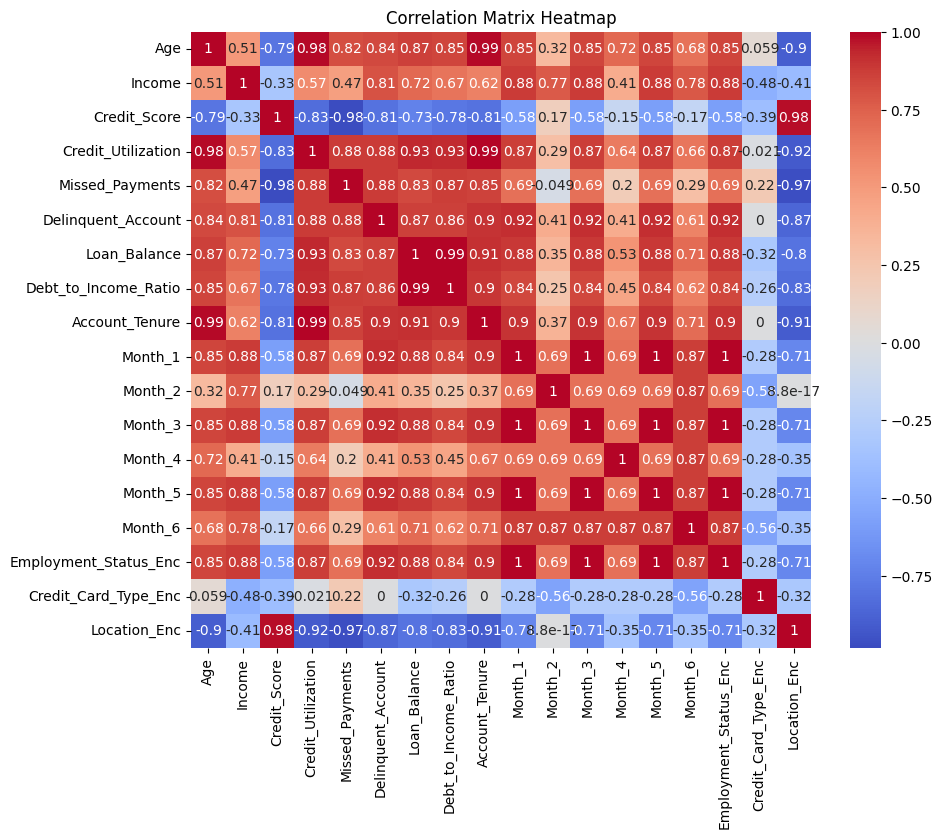


Key Risk Factors:
 Index(['Month_1', 'Employment_Status_Enc', 'Month_3'], dtype='object')

Synthetic Data Samples:
    Age        Income  Credit_Score  Credit_Utilization  Missed_Payments  \
0   51  90929.583929    681.227542           51.555836                2   
1   33  74858.575497    702.629032           30.377799                1   
2   50  92133.820317    681.404500           49.318871                2   

   Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio Employment_Status  \
0                   1  25613.386385             29.098278        Unemployed   
1                   0  15415.567592             20.538438          Employed   
2                   1  24864.259203             27.122432        Unemployed   

   Account_Tenure Credit_Card_Type  Location  Month_1  Month_2  Month_3  \
0              12             Gold   Florida        2        2        2   
1               5             Gold  New York        0        0        0   
2              12             Gold   Flo

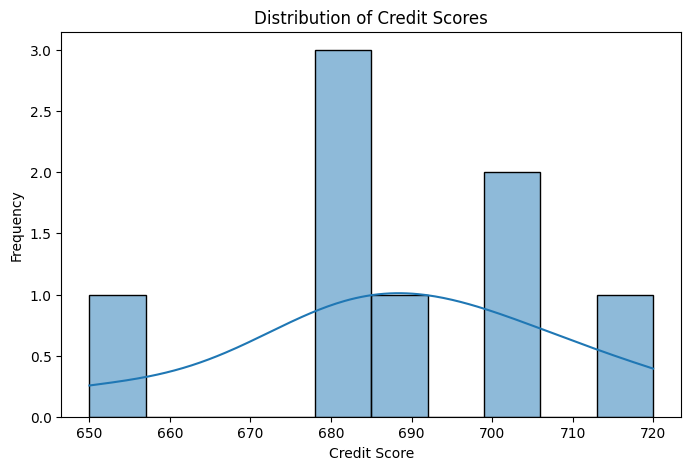

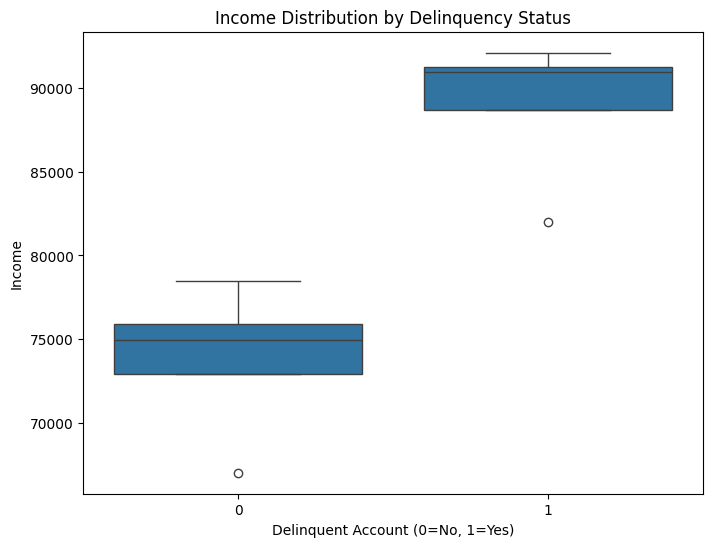


Potential Anomalies - High Credit Score:
 Empty DataFrame
Columns: [Customer_ID, Age, Income, Credit_Score, Credit_Utilization, Missed_Payments, Delinquent_Account, Loan_Balance, Debt_to_Income_Ratio, Employment_Status, Account_Tenure, Credit_Card_Type, Location, Month_1, Month_2, Month_3, Month_4, Month_5, Month_6, Employment_Status_Enc, Credit_Card_Type_Enc, Location_Enc]
Index: []

[0 rows x 22 columns]

EDA and Synthetic Data Generation with Visualizations Completed.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data dictionary
data = {
    'Customer_ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'Age': [34, 45, 29, 50, 41],
    'Income': [75000, 82000, 56000, 91000, 67000],
    'Credit_Score': [700, 650, 720, 680, 710],
    'Credit_Utilization': [30.5, 45.0, 20.0, 50.5, 35.0],
    'Missed_Payments': [1, 3, 0, 2, 1],
    'Delinquent_Account': [0, 1, 0, 1, 0],
    'Loan_Balance': [15000, 20000, 5000, 25000, 10000],
    'Debt_to_Income_Ratio': [20.0, 25.0, 10.0, 27.5, 15.0],
    'Employment_Status': ['Employed', 'Self-Employed', 'Employed', 'Unemployed', 'Employed'],
    'Account_Tenure': [5, 10, 3, 12, 7],
    'Credit_Card_Type': ['Gold', 'Standard', 'Platinum', 'Gold', 'Standard'],
    'Location': ['New York', 'California', 'Texas', 'Florida', 'Illinois'],
    'Month_1': [0, 1, 0, 2, 0],
    'Month_2': [0, 0, 1, 2, 0],
    'Month_3': [0, 1, 0, 2, 0],
    'Month_4': [0, 0, 0, 2, 1],
    'Month_5': [0, 1, 0, 2, 0],
    'Month_6': [0, 0, 0, 2, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. Exploratory Data Analysis (EDA)
print("Initial Data Overview:\n", df.describe(include='all'))

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)

# 2. Data Quality - Handling Missing Values
# For demonstration, introduce some missing values
df.loc[2, 'Income'] = np.nan
df.loc[4, 'Credit_Score'] = np.nan

# Fill missing numerical data with median
for col in ['Income', 'Credit_Score']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Check if missing values are handled
print("\nMissing Values after Treatment:\n", df.isnull().sum())

# 3. Data Profiling: Understanding Customer Risk Factors
# Encode categorical variables for analysis
le_employment = LabelEncoder()
le_credit_type = LabelEncoder()
le_location = LabelEncoder()

df['Employment_Status_Enc'] = le_employment.fit_transform(df['Employment_Status'])
df['Credit_Card_Type_Enc'] = le_credit_type.fit_transform(df['Credit_Card_Type'])
df['Location_Enc'] = le_location.fit_transform(df['Location'])

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Now, compute the correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation with Delinquent_Account:\n", corr_matrix['Delinquent_Account'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify key risk factors (e.g., high correlation)
risk_factors = corr_matrix['Delinquent_Account'].abs().sort_values(ascending=False).index[1:4]
print("\nKey Risk Factors:\n", risk_factors)

# 4. Synthetic Data Generation to Augment Dataset
def generate_synthetic_samples(df, num_samples=5):
    synthetic_data = []
    for _ in range(num_samples):
        sample = {}
        # Randomly select an existing row to base synthetic data
        base = df.sample(1).iloc[0]
        for col in df.columns:
            if col.endswith('_Enc') or col == 'Customer_ID':
                continue  # Skip encoded and ID fields
            if col in ['Age', 'Missed_Payments', 'Delinquent_Account', 'Account_Tenure']:
                # For integer-like columns, add small noise
                std_dev = df[col].std()
                noise = np.random.normal(0, std_dev * 0.1)
                val = max(0, base[col] + noise)
                val = int(round(val))
                sample[col] = val
            elif col in ['Income', 'Credit_Score', 'Credit_Utilization', 'Loan_Balance', 'Debt_to_Income_Ratio']:
                # For continuous variables, add small noise
                std_dev = df[col].std()
                noise = np.random.normal(0, std_dev * 0.1)
                val = max(0, base[col] + noise)
                sample[col] = val
            elif col.startswith('Month'):
                # Keep original month values to preserve pattern
                sample[col] = base[col]
            else:
                # For categorical, randomly pick from existing categories
                sample[col] = base[col]
        # Assign new Customer_ID
        sample['Customer_ID'] = f'Synthetic_{random.randint(1000,9999)}'
        synthetic_data.append(sample)
    return pd.DataFrame(synthetic_data)

synthetic_df = generate_synthetic_samples(df, num_samples=3)
print("\nSynthetic Data Samples:\n", synthetic_df)

# Append synthetic data to original dataset
full_df = pd.concat([df, synthetic_df], ignore_index=True)

# 5. Data Patterns & Anomalies
# Visualize distribution of Credit Score
plt.figure(figsize=(8, 5))
sns.histplot(full_df['Credit_Score'], bins=10, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Visualize relationship between Income and Delinquent Account
plt.figure(figsize=(8, 6))
sns.boxplot(x='Delinquent_Account', y='Income', data=full_df)
plt.title('Income Distribution by Delinquency Status')
plt.xlabel('Delinquent Account (0=No, 1=Yes)')
plt.ylabel('Income')
plt.show()

# Check for anomalies: e.g., Credit Scores > 800
high_score = full_df[full_df['Credit_Score'] > 800]
print("\nPotential Anomalies - High Credit Score:\n", high_score)

# Summary
print("\nEDA and Synthetic Data Generation with Visualizations Completed.")